1. [Apache Iceberg Tables](#apache-iceberg-tables)
2. [Features of Iceberg Tables](#features-of-iceberg-tables)
3. [Iceberg Functionality](#iceberg-functionality)
4. [Data on Data Lake Storage](#data-on-data-lake-storage)
5. [Catalogs in Data Lakes](#catalogs-in-data-lakes)
6. [Drawbacks of using Catalog alone](#drawbacks-of-using-catalog-alone)

#### Apache Iceberg Tables:
- Apache Iceberg is designed to handle large datasets efficiently i.e. managing data in data lakes. 
- It can partition and organize data across multiple nodes, which helps distribute the workload and speed up data processing
- It can be used by multiple engines (Dremio, Spark, etc.) that can operate on the same dataset
- Resource: https://www.dremio.com/resources/guides/apache-iceberg/e


#### Features of Iceberg Tables:
- Transactional consistency between multiple applications where files can be added, removed or modified atomically, with full read isolation and multiple concurrent writes
- Full schema evolution to track changes to a table over time
- Time travel to query historical data and verify changes between updates
- Partition layout and evolution enabling updates to partition schemes as queries and data volumes change without relying on hidden partitions or physical directories
- Rollback to prior versions to quickly correct issues and return tables to a known good state
- Advanced planning and filtering capabilities for high performance on large data volumes

Note:
- an atomic action is one that effectively happens all at once

#### Iceberg Functionality:
- Iceberg achieves these capabilities for a table via metadata files (aka manifests) tracked through point-in-time snapshots by maintaining all deltas as a table is updated over time. 
- Each snapshot provides a complete description of the table’s schema, partition and file information and offers full isolation and consistency. 
- Additionally, Iceberg intelligently organizes snapshot metadata in a hierarchical structure. 
- This enables fast and efficient changes to tables without redefining all dataset files, thus ensuring optimal performance when working at data lake scale.

#### Data on Data Lake Storage:
- Data lakes are large repositories that store all structured and unstructured data at any scale. 
- Provides centralizing data and interact on a shared data repository for all processing, analytics and reporting
- Traditionally, data lakes were with the Apache HDFS. Now, we have Amazon S3 or Microsoft Azure Data Lake Storage
- Datasets within data lakes are organized as collections of files within directory structures, often with multiple files in one directory representing a single table. 
- The data is highly accessible and flexible. 
- But, concepts provided by traditional databases and data warehouses are not addressed by directories of files and require additional tooling to define. This includes:
    - What is the schema of a dataset, including columns and data types
    - Which files comprise the dataset and how are they organized (e.g., partitions)
    - How different applications coordinate changes to the dataset, including both changes to the definition of the dataset and changes to data
- Hive Metastore (HMS) and AWS Glue Data Catalog are the most popular data lake catalogs. Both Hive and AWS Glue contain the schema, table structure and data location for datasets within data lake storage.

#### Catalogs in Data Lakes:
- To better organize data within data lakes, use metadata catalogs, which define the tables within data lake storage which share a common definition and view of data within the data lake, which is helpful for processing and producing consistent results.
- Catalogs are used to define:
    - What datasets exist in the data lake
    - Where different datasets are located within the data lake
    - How datasets are structured in terms of columns, names, data types, etc.

#### Drawbacks of using Catalog alone:

- Catalogs do not define which data files are present and part of the dataset. As a result, applications must rely on reading file metadata in data lake storage to identify which files are part of a dataset at any given time.
- As long as the dataset is static and does not change, different applications can operate on a consistent view of the dataset. However, challenges are created when one application writes to and modifies the dataset and those changes need to be coordinated with another application that reads from the same dataset. For example, if an ETL process updates the dataset by adding and removing several files from storage, another application that reads the dataset may process a partial or inconsistent view of the dataset and generate incorrect results. This occurs when some files have been added or removed from storage, but not all required changes were completed.
- Without automatic coordination of data changes between applications in the data lake, organizations need to create complicated pipelines or staging areas which can be brittle and difficult to manage manually.
- Iceberg tables overcomes these difficulties and challenges

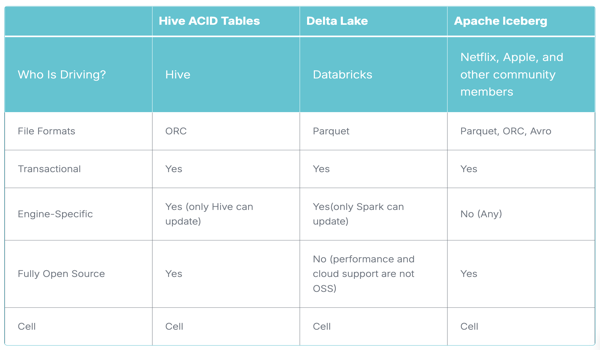

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/comparison.jpeg')
new_image = img.resize((600, 350))
display(new_image)